In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import glob, os, json
import pandas as pd
from helper import *

In [17]:
np.version.version
print(pd. __version__)

2.2.3


In [3]:
proj_root="/pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5_w_simpolSOA"

In [4]:
dev_str = 'HOST/rhss-no_sacado'
dev_dir = os.path.join(proj_root, dev_str)
json_pattern = os.path.join(str(dev_dir),'wall_*.json')
cpu_list= glob.glob(json_pattern)

In [5]:
#dev_str = 'CUDA/rhss-no_sacado'
#dev_dir = os.path.join(proj_root, dev_str)
#json_pattern = os.path.join(str(dev_dir),'wall_*.json')
#volta_list= glob.glob(json_pattern)

In [6]:
# cpu_list

In [6]:
cpu = create_dataFrame_cpu(cpu_list)

In [21]:
cpu

,wall_time,per_sample,nSamples,nBatch,nThread,nParticles
Aerosol RHSs_1b_64t1p,0.000198,0.000198,1.0,1.0,64.0,1.0
Aerosol Numerical Jacobian_1b_64t1p,0.009665,0.009665,1.0,1.0,64.0,1.0
Aerosol RHSs_1b_64t10p,0.000219,0.000219,1.0,1.0,64.0,10.0
Aerosol Numerical Jacobian_1b_64t10p,0.016093,0.016093,1.0,1.0,64.0,10.0
Aerosol RHSs_1b_64t50p,0.000303,0.000303,1.0,1.0,64.0,50.0
Aerosol Numerical Jacobian_1b_64t50p,0.063254,0.063254,1.0,1.0,64.0,50.0
Aerosol RHSs_1b_64t100p,0.000436,0.000436,1.0,1.0,64.0,100.0
Aerosol Numerical Jacobian_1b_64t100p,0.155410,0.155410,1.0,1.0,64.0,100.0
Aerosol RHSs_1b_128t1p,0.000203,0.000203,1.0,1.0,128.0,1.0
Aerosol Numerical Jacobian_1b_128t1p,0.009759,0.009759,1.0,1.0,128.0,1.0


In [7]:
cpu_rhs = cpu[cpu.index.str.contains('Aerosol RHSs_')]
cpu_jacobian = cpu[cpu.index.str.contains('Aerosol Numerical Jacobian_')]

In [29]:
cpu_rhs

,wall_time,per_sample,nSamples,nBatch,nThread,nParticles
Aerosol RHSs_1b_64t1p,0.000198,0.000198,1.0,1.0,64.0,1.0
Aerosol RHSs_1b_64t10p,0.000219,0.000219,1.0,1.0,64.0,10.0
Aerosol RHSs_1b_64t50p,0.000303,0.000303,1.0,1.0,64.0,50.0
Aerosol RHSs_1b_64t100p,0.000436,0.000436,1.0,1.0,64.0,100.0
Aerosol RHSs_1b_128t1p,0.000203,0.000203,1.0,1.0,128.0,1.0
Aerosol RHSs_1b_128t10p,0.000237,0.000237,1.0,1.0,128.0,10.0
Aerosol RHSs_1b_128t50p,0.000322,0.000322,1.0,1.0,128.0,50.0
Aerosol RHSs_1b_128t100p,0.000434,0.000434,1.0,1.0,128.0,100.0
Aerosol RHSs_5b_64t1p,0.000209,0.000042,5.0,5.0,64.0,1.0
Aerosol RHSs_5b_64t10p,0.000235,0.000047,5.0,5.0,64.0,10.0


In [11]:
volta = create_dataFrame_gpu(volta_list)

In [12]:
volta_rhs = volta[volta.index.str.contains('Aerosol RHSs_')]
volta_jacobian = volta[volta.index.str.contains('Aerosol Numerical Jacobian_')]

In [13]:
volta_rhs

,wall_time,per_sample,nSamples,nBatch,vector_size,team_size,nParticles
Aerosol RHSs_1t_-1v_-1b_1p,0.000247,2.473550e-04,1.0,1.0,-1.0,-1.0,1.0
Aerosol RHSs_1t_-1v_-1b_10p,0.000384,3.837790e-04,1.0,1.0,-1.0,-1.0,10.0
Aerosol RHSs_1t_-1v_-1b_50p,0.001240,1.240478e-03,1.0,1.0,-1.0,-1.0,50.0
Aerosol RHSs_1t_-1v_-1b_100p,0.002687,2.686764e-03,1.0,1.0,-1.0,-1.0,100.0
Aerosol RHSs_1t_-1v_-1b_1000p,0.021706,2.170589e-02,1.0,1.0,-1.0,-1.0,1000.0
...,...,...,...,...,...,...,...
Aerosol RHSs_10000t_2v_-1b_10p,0.013284,1.328429e-06,10000.0,10000.0,-1.0,2.0,10.0
Aerosol RHSs_10000t_2v_-1b_50p,0.061896,6.189649e-06,10000.0,10000.0,-1.0,2.0,50.0
Aerosol RHSs_10000t_4v_-1b_1p,0.003326,3.326162e-07,10000.0,10000.0,-1.0,4.0,1.0
Aerosol RHSs_10000t_4v_-1b_10p,0.013261,1.326058e-06,10000.0,10000.0,-1.0,4.0,10.0


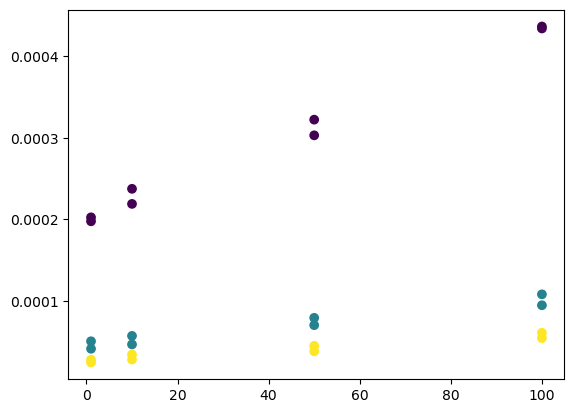

In [13]:
plt.scatter(cpu_rhs.nParticles, cpu_rhs.per_sample, c=cpu_rhs.nSamples, cmap='viridis')

In [27]:
group['nSamples']

Aerosol RHSs_1b_128t100p    1.0
Name: nSamples, dtype: float64

Text(0, 0.5, 'Timer per RHS')

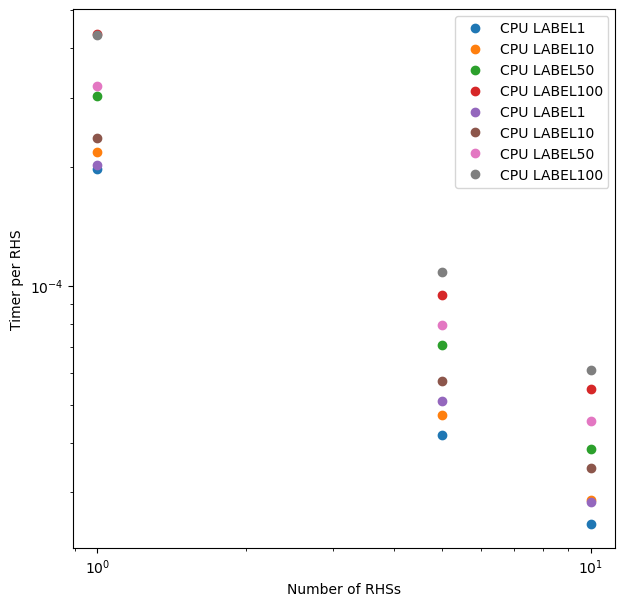

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
for name, group in cpu_rhs.groupby(['nThread', 'nParticles']):

    label='CPU LABEL' + str(int(name[1]))
    #if name[0] == 100:
    group.plot(ax=axs,
              x='nSamples',
              y='per_sample',
              style='o',logx=True,logy=True,label=label)

"""
# conf_name = {0:'Kokkos::Auto'}
for name, group in volta_rhs.groupby('nParticles'):
  # label='Volta ' + conf_name[name]
  label='Volta ' + str(int(name))
  group.plot(ax=axs,
             x='nSamples',
             y='per_sample',style='*',
             logx=True,logy=True,label=label)
"""

axs.set_xlabel("Number of RHSs")
axs.set_ylabel("Timer per RHS")
#plt.savefig("rhs_cpu_vs_gpu.pdf")

Text(0, 0.5, 'Timer per Jacs')

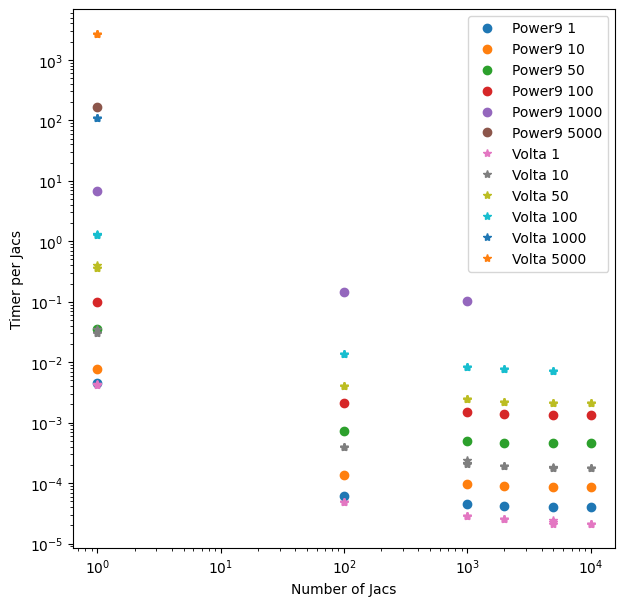

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
for name, group in cpu_jacobian.groupby(['nThread', 'nParticles']):
  #  print(name)
   label='CPU LABEL ' + str(int(name[1]))
   if name[0] == 160:
    group.plot(ax=axs,
              x='nSamples',
              y='per_sample',
              style='o',logx=True,logy=True,label=label)

# conf_name = {0:'Kokkos::Auto'}
for name, group in volta_jacobian.groupby('nParticles'):
  # label='Volta ' + conf_name[name]
  label='Volta ' + str(int(name))
  group.plot(ax=axs,
             x='nSamples',
             y='per_sample',style='*',
             logx=True,logy=True,label=label)

axs.set_xlabel("Number of Jacs")
axs.set_ylabel("Timer per Jacs")

In [16]:
# volta_jacobian

,wall_time,per_sample,nSamples,nBatch,vector_size,team_size,nParticles
Aerosol Numerical Jacobian_1t_-1v_-1b_1p,0.004291,0.004291,1.0,1.0,-1.0,-1.0,1.0
Aerosol Numerical Jacobian_1t_-1v_-1b_10p,0.030500,0.030500,1.0,1.0,-1.0,-1.0,10.0
Aerosol Numerical Jacobian_1t_-1v_-1b_50p,0.360912,0.360912,1.0,1.0,-1.0,-1.0,50.0
Aerosol Numerical Jacobian_1t_-1v_-1b_100p,1.301249,1.301249,1.0,1.0,-1.0,-1.0,100.0
Aerosol Numerical Jacobian_1t_-1v_-1b_1000p,109.980016,109.980016,1.0,1.0,-1.0,-1.0,1000.0
...,...,...,...,...,...,...,...
Aerosol Numerical Jacobian_10000t_2v_-1b_10p,1.805662,0.000181,10000.0,10000.0,-1.0,2.0,10.0
Aerosol Numerical Jacobian_10000t_2v_-1b_50p,20.804890,0.002080,10000.0,10000.0,-1.0,2.0,50.0
Aerosol Numerical Jacobian_10000t_4v_-1b_1p,0.214710,0.000021,10000.0,10000.0,-1.0,4.0,1.0
Aerosol Numerical Jacobian_10000t_4v_-1b_10p,1.806983,0.000181,10000.0,10000.0,-1.0,4.0,10.0


Text(0, 0.5, 'Timer per RHS')

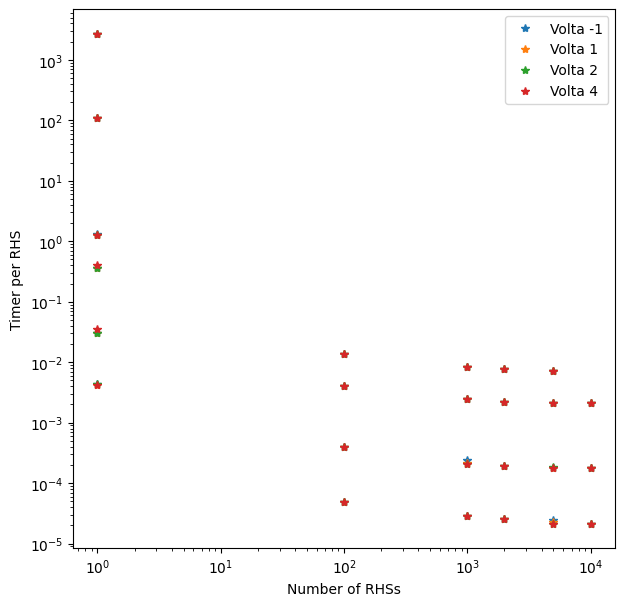

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
for name, group in volta_jacobian.groupby('team_size'):
  # label='Volta ' + conf_name[name]
  label='Volta ' + str(int(name))
  group.plot(ax=axs,
             x='nSamples',
             y='per_sample',style='*',
             logx=True,logy=True,label=label)

axs.set_xlabel("Number of RHSs")
axs.set_ylabel("Timer per RHS")

In [18]:
# t1 = volta.groupby('nParticles')

In [19]:
# for name, group in volta.groupby('nParticles'):
#   print(group)

In [20]:
# cpu